,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary
age,1,0.037623,0.0796832,0.0593506,0.101992,0.23704
education-num,0.037623,1,0.126907,0.0817113,0.146206,0.3328
capital-gain,0.0796832,0.126907,1,-0.0321023,0.0838804,0.221034
capital-loss,0.0593506,0.0817113,-0.0321023,1,0.0541949,0.148687
hours-per-week,0.101992,0.146206,0.0838804,0.0541949,1,0.227199
income_binary,0.23704,0.3328,0.221034,0.148687,0.227199,1


<Figure size 1440x432 with 0 Axes>

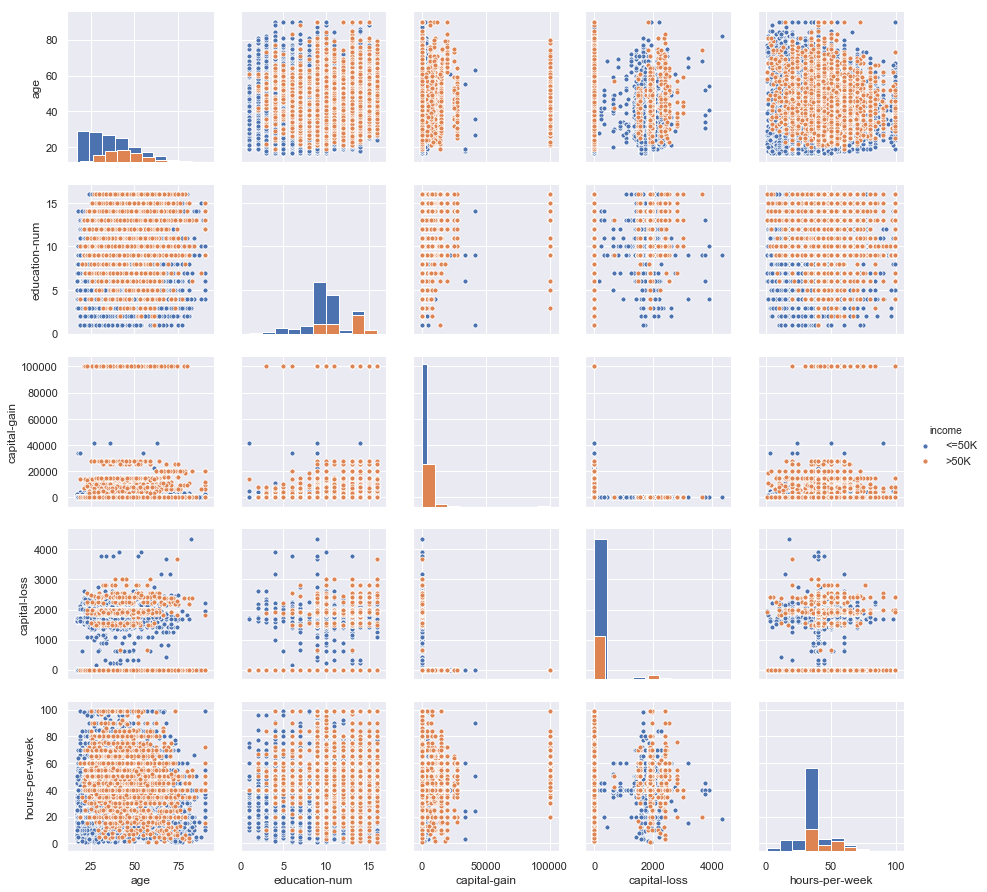

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries for visulization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("C:/Users/Junjie/Documents/Github/p1_charityml/census.csv")
display(data.head(n=5))

# check the correlations between numerical features
ft_num = data.select_dtypes(include=['int64','float64']).columns.values
ft_cat = data.select_dtypes(exclude=['int64','float64']).columns.values

data['income_binary'] = data['income'].map(lambda x: 1 if x == '>50K' else 0)
corr = data[np.append(ft_num, 'income_binary')].corr()
cm = sns.light_palette("blue", as_cmap=True)
display(corr.style.background_gradient(cmap=cm))

# check if any linear pattern exists between any two numerical features
fig = plt.figure(figsize = (20,6))
sns.pairplot(data[np.append(ft_num, 'income')], diag_kind = 'hist', hue='income', plot_kws={"s": 25})
plt.show()

